# Crime rates in Chicago (2020-2025)
*By Ernest Azukaeme*

*This Project was meant to do a basic yet informative analysis of the rate of crime in chciago after 2020.I used the chciago police records from 2001 to present and filtered it in order to get the dataset from 2020 to 2025.After thant i did ab analysis to determine whether there was a singifcant change in the crime rate*

# Loading and Cleaning Data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data=pd.read_csv(r"C:\Users\tejir\Downloads\Crimes_-_2001_to_Present_20250203 (6).csv")

crime_data.columns = crime_data.columns.str.strip() 
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

crime_data['Year'] = crime_data['Date'].dt.year
crime_data['Month'] = crime_data['Date'].dt.month


crime_data= crime_data[['Year','Primary Type','Arrest','Month']]

crime_data = crime_data.dropna()

crime_data.head()

print("Cleaned Data Sample:")
print(crime_data.head())



Cleaned Data Sample:
   Year     Primary Type  Arrest  Month
0  2025          ASSAULT   False      1
1  2025  CRIMINAL DAMAGE   False      1
2  2025  CRIMINAL DAMAGE   False      1
3  2025     INTIMIDATION   False      1
4  2025            THEFT   False      1


# Yearly Crime Trend

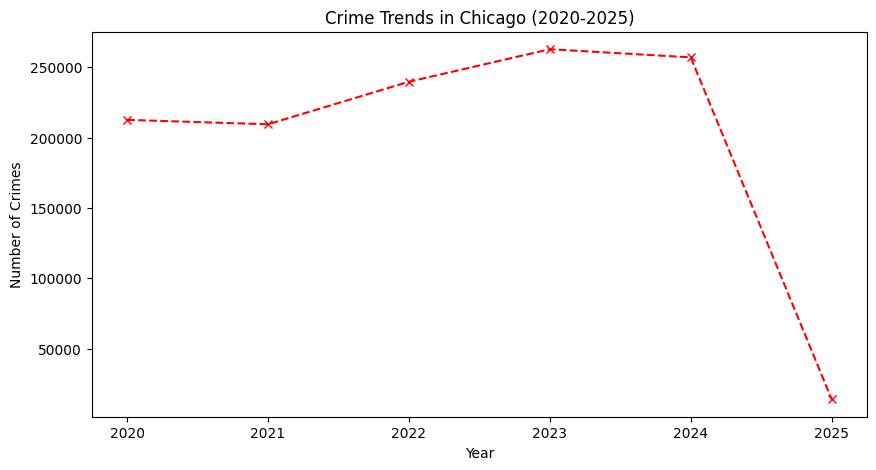

In [34]:
crime_trends = crime_data.groupby("Year")["Primary Type"].count()

plt.figure(figsize=(10,5))
plt.plot(crime_trends.index, crime_trends.values, marker="x",linestyle="--",color="red")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crime Trends in Chicago (2020-2025)")
plt.grid
plt.show()

# Top 5 Crimes in Chicago

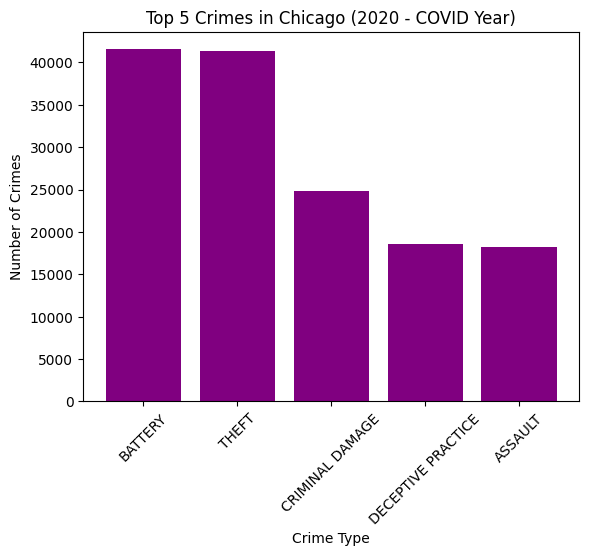

In [22]:
# Find top 5 locations for crime in 2020
top_locations_2020 = crime_data[crime_data["Year"] == 2020]["Primary Type"].value_counts().head(5)

# Plot
plt.bar(top_locations_2020.index, top_locations_2020.values, color="purple")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.title("Top 5 Crimes in Chicago (2020 - COVID Year)")
plt.xticks(rotation=45)
plt.show()

# Comparison of the top 5 crimes in Chicago From 2020 to 2025

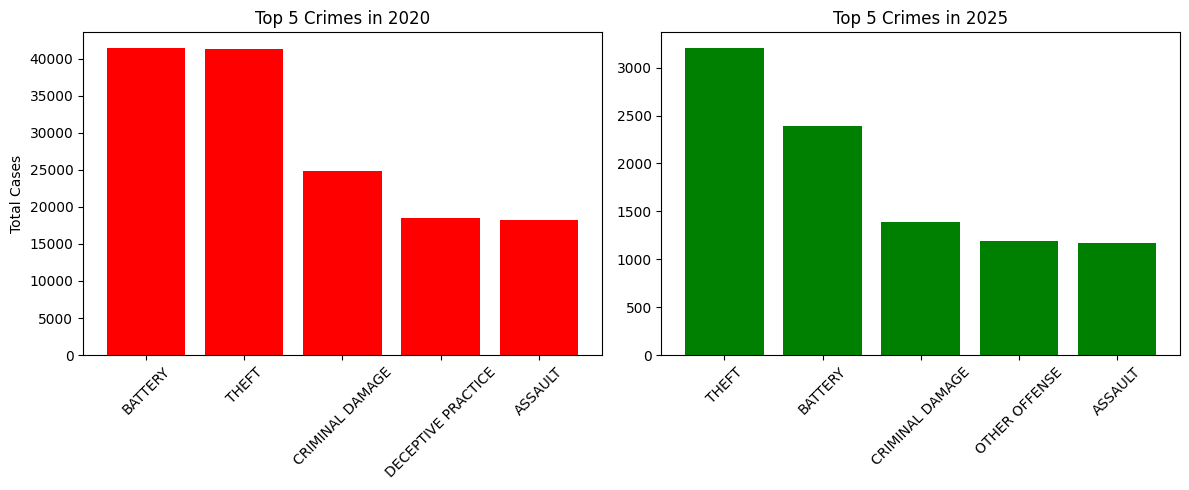

In [28]:
top_crimes_2020 = crime_data[crime_data["Year"] == 2020]["Primary Type"].value_counts().head(5)  
top_crimes_2025 = crime_data[crime_data["Year"] == 2025]["Primary Type"].value_counts().head(5)  

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# 2020 Crimes  
axes[0].bar(top_crimes_2020.index, top_crimes_2020.values, color="red")  
axes[0].set_title("Top 5 Crimes in 2020")  
axes[0].set_ylabel("Total Cases")  
axes[0].tick_params(axis="x", rotation=45)  

# 2025 Crimes  
axes[1].bar(top_crimes_2025.index, top_crimes_2025.values, color="green")  
axes[1].set_title("Top 5 Crimes in 2025")  
axes[1].tick_params(axis="x", rotation=45)  

plt.tight_layout()  
plt.show()  

# Arrest Rate in Chicago from 2020 to 2025

C:\Users\tejir\AppData\Local\Temp\ipykernel_19152\264471807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrest_rates.index, y=arrest_rates.values, palette="coolwarm")


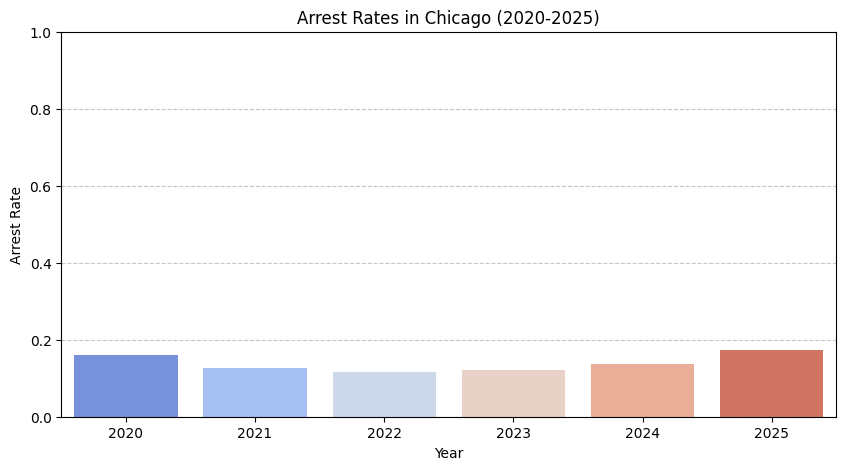

In [47]:
arrest_rates = crime_data.groupby("Year")["Arrest"].mean()  

plt.figure(figsize=(10, 5))
sns.barplot(x=arrest_rates.index, y=arrest_rates.values, palette="coolwarm")

plt.xlabel("Year")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rates in Chicago (2020-2025)")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Heat Map of The Crime Trends By Month

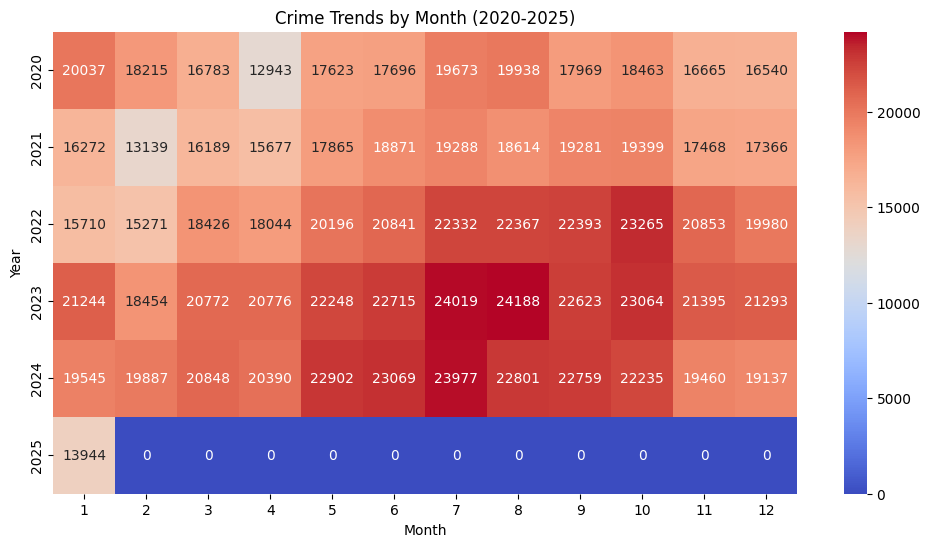

In [44]:
 


monthly_trends = crime_data.pivot_table(index="Year", columns="Month", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_trends, cmap="coolwarm", annot=True, fmt="d")
plt.title("Crime Trends by Month (2020-2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
  

*From the analysis of Chicago crime data (2020-2025), the key findings show fluctuations in crime rates, with a sligh increase from 2023 to 2024 and then a significant decrease in crimes in 2024. The most common crimes include battery and theft. Monthly trends highlight seasonal variations, where crime rates tend to peak in the months of june and july, possibly due to summer season and also summer hildiay for schools. These insights can help policymakers and law enforcement better understand crime dynamics and develop targeted interventions for public safety.*